In [1]:
import mplfinance as mpf
import pandas as pd 
import numpy as np
import yfinance as yf
from sklearn import svm
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
EURUSD = pd.read_csv("C:/Users/Kazem Kamrani/Desktop/ForexData/EURUSD60J.csv",index_col = "Date" , parse_dates = True
                    ,na_values=['nan'])
df = EURUSD
df = pd.DataFrame(df)
#df =df['2012-01-01':]
print(df)


              High1     Low1   Close1    High2     Low2   Close2    High3  \
Date                                                                        
2011-12-26  1.30773  1.30661  1.30705  1.30762  1.30579  1.30595  1.30763   
2011-12-26  1.30762  1.30579  1.30595  1.30763  1.30586  1.30705  1.30780   
2011-12-26  1.30763  1.30586  1.30705  1.30780  1.30685  1.30712  1.30740   
2011-12-26  1.30780  1.30685  1.30712  1.30740  1.30592  1.30609  1.30732   
2011-12-26  1.30740  1.30592  1.30609  1.30732  1.30570  1.30625  1.30670   
...             ...      ...      ...      ...      ...      ...      ...   
2022-06-17  1.05285  1.04998  1.05202  1.05359  1.05110  1.05179  1.05267   
2022-06-17  1.05359  1.05110  1.05179  1.05267  1.05124  1.05202  1.05232   
2022-06-17  1.05267  1.05124  1.05202  1.05232  1.04834  1.04858  1.05080   
2022-06-17  1.05232  1.04834  1.04858  1.05080  1.04758  1.04948  1.05000   
2022-06-17  1.05080  1.04758  1.04948  1.05000  1.04736  1.04844  1.04873   

In [3]:
forecast_out = int(24)
df['PredictionClose'] = df['Close9'].shift(-forecast_out)
#print(df)

In [4]:
X = np.array(df.drop(['PredictionClose'],1))
X = preprocessing.scale(X)
X_forecast = X[-forecast_out:]
X = X[:-forecast_out]

C:\Users\Kazem Kamrani\AppData\Local\Temp\ipykernel_1364\1567216897.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['PredictionClose'],1))


In [5]:
Y = np.array(df['PredictionClose'])
Y = Y[:-forecast_out]

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [7]:
# Training
LR = LinearRegression()
LR.fit(X_train, Y_train)
testpredictions = LR.predict(X_test)
#Testing
confidence = LR.score(X_test,Y_test)
print("confidence:", confidence)
print('R2 Score is: ', metrics.explained_variance_score(Y_test, testpredictions))
print('Mean Squared Error is: ', metrics.mean_squared_error(Y_test, testpredictions))
print('Root Mean Squared Error is: ', np.sqrt(metrics.mean_squared_error(Y_test, testpredictions)))
print('Mean Absolute Error is: ', metrics.mean_absolute_error(Y_test, testpredictions))
print('Mean Absolute Percentage Error is: ', metrics.mean_absolute_percentage_error(Y_test, testpredictions))

confidence: 0.9961386590421132
R2 Score is:  0.996138768405551
Mean Squared Error is:  3.2974589097874804e-05
Root Mean Squared Error is:  0.005742350485461054
Mean Absolute Error is:  0.004287900942101049
Mean Absolute Percentage Error is:  0.003632480365261232


In [8]:
#print(X_forecast)

In [9]:
forecast_prediction = LR.predict(X_forecast)
print(forecast_prediction)

[1.05505253 1.05467047 1.05462759 1.05418638 1.05366159 1.05282964
 1.05225492 1.05300878 1.05207107 1.05023591 1.05181912 1.05202152
 1.05180724 1.05200899 1.04856791 1.04946409 1.04828913 1.04564777
 1.04761478 1.04683257 1.04902165 1.04915674 1.04933719 1.04962239]


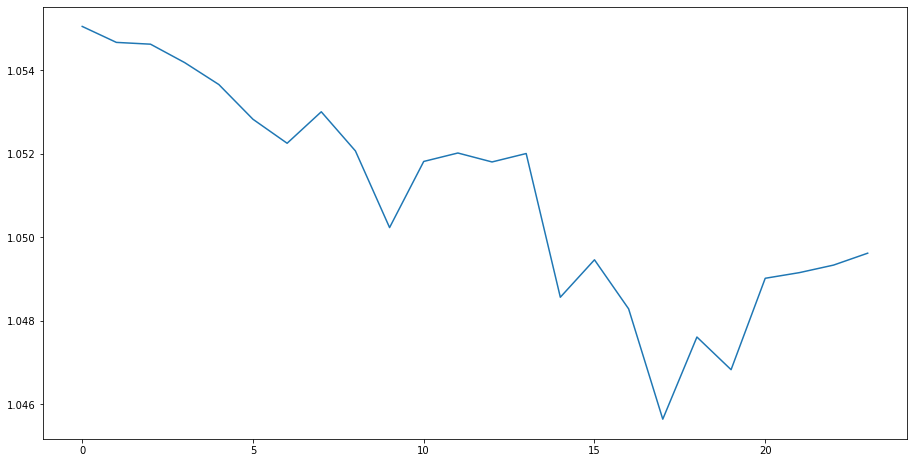

In [14]:
plt.axes([1, 1, 2 , 1.5])
plt.plot(forecast_prediction)
plt.show()

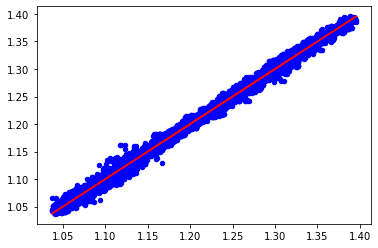

In [11]:
plt.plot(figsize = (10,8))
plt.scatter(Y_test, testpredictions, color='b',s=20)
plt.plot(Y_test, Y_test, 'r')
plt.show()